In [7]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ajayt0m/Forecasting_Crop_Prices_Maharashtra/main/onion_daily_cleaned.csv'

onion_df = pd.read_csv(file_url)

In [8]:
#Set index as date
onion_df.index  = pd.to_datetime(onion_df['date_arrival'], format = '%Y-%m-%d')

In [10]:
#might be redundant
onion_df['date_arrival'] = pd.to_datetime(onion_df['date_arrival'], format = '%Y-%m-%d')

In [11]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_df.head(10))

,date_arrival,MIN,MAX,MODAL,Arrival
date_arrival,,,,,
2021-01-01,2021-01-01,865.15,2706.88,2060.60,11575.0
2021-01-02,2021-01-02,1105.07,2720.16,2181.84,15560.0
2021-01-03,2021-01-03,1129.41,2741.47,2141.18,3954.0
2021-01-04,2021-01-04,967.31,2754.16,2167.55,21441.0
2021-01-05,2021-01-05,1188.84,2793.71,2275.47,21526.0
2021-01-06,2021-01-06,1335.29,2698.00,2242.65,7103.0
2021-01-07,2021-01-07,1335.29,2698.00,2242.65,7103.0
2021-01-08,2021-01-08,1335.29,2698.00,2242.65,7103.0
2021-01-09,2021-01-09,1160.00,3223.00,2832.40,3389.0


In [12]:
onion_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2021-01-01 to 2023-10-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_arrival  1004 non-null   datetime64[ns]
 1   MIN           1004 non-null   float64       
 2   MAX           1004 non-null   float64       
 3   MODAL         1004 non-null   float64       
 4   Arrival       1004 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 47.1 KB


<AxesSubplot: xlabel='date_arrival'>

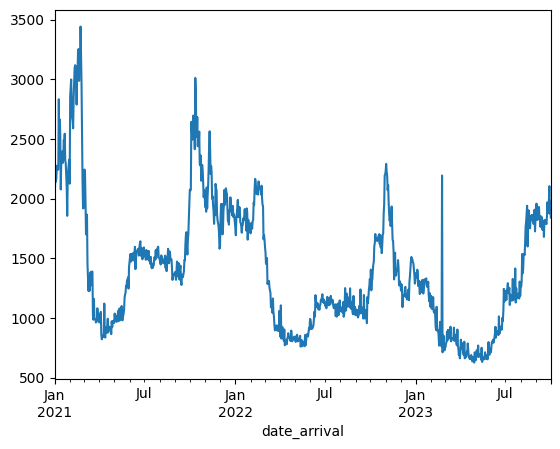

In [14]:
price = onion_df['MODAL']
price.plot()

In [15]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(price.head(10))

date_arrival
2021-01-01    2060.60
2021-01-02    2181.84
2021-01-03    2141.18
2021-01-04    2167.55
2021-01-05    2275.47
2021-01-06    2242.65
2021-01-07    2242.65
2021-01-08    2242.65
2021-01-09    2832.40
2021-01-10    2375.00
Name: MODAL, dtype: float64

In [16]:
import numpy as np

def df_to_X_y(df, window_size=5):
  indices = df.index
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y), indices

In [17]:
WINDOW_SIZE = 15
X, y, indices  = df_to_X_y(price, WINDOW_SIZE)
X.shape, y.shape

((989, 15, 1), (989,))

In [18]:
X

array([[[2060.6 ],
        [2181.84],
        [2141.18],
        ...,
        [2076.5 ],
        [2319.16],
        [2391.25]],

       [[2181.84],
        [2141.18],
        [2167.55],
        ...,
        [2319.16],
        [2391.25],
        [2394.59]],

       [[2141.18],
        [2167.55],
        [2275.47],
        ...,
        [2391.25],
        [2394.59],
        [2298.81]],

       ...,

       [[1738.89],
        [1765.26],
        [1811.44],
        ...,
        [1878.12],
        [1978.39],
        [2104.41]],

       [[1765.26],
        [1811.44],
        [1678.89],
        ...,
        [1978.39],
        [2104.41],
        [1874.3 ]],

       [[1811.44],
        [1678.89],
        [1819.26],
        ...,
        [2104.41],
        [1874.3 ],
        [1982.  ]]])

In [19]:
X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:900], y[800:900]
X_test, y_test = X[900:], y[900:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((800, 15, 1), (800,), (100, 15, 1), (100,), (89, 15, 1), (89,))

In [20]:
y_test

array([1245.83, 1291.2 , 1210.6 , 1206.83, 1252.27, 1108.48, 1195.57,
       1171.26, 1185.87, 1143.76, 1148.9 , 1326.93, 1149.9 , 1256.03,
       1202.81, 1212.54, 1414.06, 1129.23, 1248.93, 1162.05, 1166.28,
       1184.36, 1191.72, 1204.6 , 1162.71, 1304.72, 1184.25, 1256.28,
       1261.52, 1306.15, 1535.75, 1373.94, 1406.93, 1521.04, 1535.14,
       1526.87, 1629.05, 1765.82, 1803.41, 1866.24, 1940.02, 1598.5 ,
       1846.82, 1901.62, 1858.09, 1802.04, 1750.25, 1840.98, 1831.78,
       1861.85, 1817.04, 1862.65, 1826.  , 1788.54, 1810.16, 1906.7 ,
       1725.  , 1837.94, 1828.39, 1957.6 , 1820.24, 1889.37, 1898.  ,
       1926.74, 1929.74, 1819.7 , 1851.77, 1762.44, 1850.85, 1820.98,
       1843.26, 1738.89, 1765.26, 1811.44, 1678.89, 1819.26, 1818.48,
       1821.37, 1801.32, 1785.52, 1840.66, 1968.27, 1912.86, 1878.12,
       1978.39, 2104.41, 1874.3 , 1982.  , 1840.33])

In [21]:
price_training_mean = np.mean(X_train[:, :, 0]).round(2)
price_training_std = np.std(X_train[:, :, 0]).round(2)

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - price_training_mean) / price_training_std
  return X

In [22]:
price_training_mean

1463.23

In [23]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

array([[[-1.01822268],
        [-1.05914411],
        [-1.00206012],
        ...,
        [-0.44358086],
        [-0.58649686],
        [-0.43391703]],

       [[-1.05914411],
        [-1.00206012],
        [-1.00129226],
        ...,
        [-0.58649686],
        [-0.43391703],
        [-0.40715423]],

       [[-1.00206012],
        [-1.00129226],
        [-1.05045416],
        ...,
        [-0.43391703],
        [-0.40715423],
        [-0.32218373]],

       ...,

       [[ 0.51626557],
        [ 0.56565221],
        [ 0.65213971],
        ...,
        [ 0.77702032],
        [ 0.96480944],
        [ 1.20082405]],

       [[ 0.56565221],
        [ 0.65213971],
        [ 0.4038955 ],
        ...,
        [ 0.96480944],
        [ 1.20082405],
        [ 0.76986609]],

       [[ 0.65213971],
        [ 0.4038955 ],
        [ 0.66678528],
        ...,
        [ 1.20082405],
        [ 0.76986609],
        [ 0.97157037]]])

In [24]:
def preprocess_output(y):
  y[:,] = (y[:,] - price_training_mean) / price_training_std 
  return y

In [44]:
y_train

array([ 1.74428317,  1.56490308,  1.61337204,  1.92364454,  1.88543871,
        2.02348535,  1.60071168,  1.56278678,  1.37381777,  1.18396854,
        0.73476917,  1.27680494,  1.44315011,  1.54014421,  1.61694915,
        1.23938571,  2.61352187,  2.74113681,  2.87393951,  2.53194119,
        2.27377095,  2.22316696,  2.10815619,  2.58318195,  2.83245622,
        3.05412492,  3.09830508,  3.08431501,  2.86875176,  2.480869  ,
        2.93821519,  3.03183819,  3.34220433,  3.35113775,  2.8518026 ,
        3.23365484,  3.01312857,  3.70431688,  3.25300122,  2.78458657,
        1.94977058,  1.26847083,  0.85109093,  0.85440584,  1.33572432,
        1.46112932,  1.39323907,  0.9688173 ,  0.4440678 ,  0.64329993,
        0.75353498, -0.02324188, -0.24813185, -0.44322502, -0.2569529 ,
       -0.44459219, -0.21593782, -0.15400318, -0.35814215, -0.14182976,
       -0.14182976, -0.14182976, -0.82410338, -0.89532728, -0.56889222,
       -0.86618597, -0.88189905, -0.88450229, -0.93990074, -0.92

In [25]:
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

array([-0.40715423, -0.32218373, -0.47313419, -0.48019477, -0.39509317,
       -0.66438805, -0.50128289, -0.5468115 , -0.51944939, -0.59831445,
       -0.58868808, -0.25526735, -0.58681524, -0.38805132, -0.48772357,
       -0.46950089, -0.09208727, -0.62552673, -0.40134844, -0.56406031,
       -0.55613822, -0.52227737, -0.5084933 , -0.4843712 , -0.56282423,
       -0.296863  , -0.52248338, -0.38758311, -0.37776945, -0.29418485,
        0.13581796, -0.1672254 , -0.10544058,  0.10826856,  0.13467553,
        0.11918719,  0.31055342,  0.566701  ,  0.63710085,  0.75477105,
        0.89294878,  0.25333833,  0.7184006 ,  0.82103193,  0.73950744,
        0.63453507,  0.53754097,  0.70746325,  0.69023317,  0.7465493 ,
        0.66262759,  0.74804757,  0.67940818,  0.6092518 ,  0.64974249,
        0.83054593,  0.4902519 ,  0.70176983,  0.68388426,  0.92587321,
        0.66862066,  0.79808971,  0.81425227,  0.86807754,  0.87369604,
        0.66760933,  0.72767113,  0.56037082,  0.72594812,  0.67

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((15, 1)))
model1.add(LSTM(136, activation='relu'))
model1.add(Dense(1))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 136)               75072     
                                                                 
 dense (Dense)               (None, 1)                 137       
                                                                 
Total params: 75209 (293.79 KB)
Trainable params: 75209 (293.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
cp1 = ModelCheckpoint('model1', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp1])

Epoch 1/20
22/25 [=========================>....] - ETA: 0s - loss: 0.8506 - root_mean_squared_error: 0.9223INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 4s 120ms/step - loss: 0.8238 - root_mean_squared_error: 0.9076 - val_loss: 1.3806 - val_root_mean_squared_error: 1.1750
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.6693 - root_mean_squared_error: 0.8181INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 72ms/step - loss: 0.6693 - root_mean_squared_error: 0.8181 - val_loss: 1.0493 - val_root_mean_squared_error: 1.0244
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.4956 - root_mean_squared_error: 0.7040INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 85ms/step - loss: 0.4956 - root_mean_squared_error: 0.7040 - val_loss: 0.6348 - val_root_mean_squared_error: 0.7968
Epoch 4/20
22/25 [=========================>....] - ETA: 0s - loss: 0.3041 - root_mean_squared_error: 0.5514INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 72ms/step - loss: 0.2930 - root_mean_squared_error: 0.5412 - val_loss: 0.1246 - val_root_mean_squared_error: 0.3531
Epoch 5/20
23/25 [==========================>...] - ETA: 0s - loss: 0.1543 - root_mean_squared_error: 0.3929INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 83ms/step - loss: 0.1584 - root_mean_squared_error: 0.3981 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3083
Epoch 6/20
24/25 [===========================>..] - ETA: 0s - loss: 0.1348 - root_mean_squared_error: 0.3671INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 87ms/step - loss: 0.1363 - root_mean_squared_error: 0.3692 - val_loss: 0.0355 - val_root_mean_squared_error: 0.1885
Epoch 7/20
25/25 [==============================] - 0s 15ms/step - loss: 0.1223 - root_mean_squared_error: 0.3497 - val_loss: 0.0428 - val_root_mean_squared_error: 0.2068
Epoch 8/20
25/25 [==============================] - 0s 19ms/step - loss: 0.1105 - root_mean_squared_error: 0.3324 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2096
Epoch 9/20
25/25 [==============================] - 0s 18ms/step - loss: 0.1013 - root_mean_squared_error: 0.3183 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2116
Epoch 10/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0991 - root_mean_squared_error: 0.3148 - val_loss: 0.0498 - val_root_mean_squared_error: 0.2231
Epoch 11/20
23/25 [==========================>...] - ETA: 0s - loss: 0.0846 - root_mean_squared_error: 0.2909INFO:tensorflow:Assets written to: model1\asse

INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 3s 105ms/step - loss: 0.0947 - root_mean_squared_error: 0.3077 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1679
Epoch 12/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0942 - root_mean_squared_error: 0.3070 - val_loss: 0.0535 - val_root_mean_squared_error: 0.2313
Epoch 13/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0928 - root_mean_squared_error: 0.3046 - val_loss: 0.0386 - val_root_mean_squared_error: 0.1964
Epoch 14/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0865 - root_mean_squared_error: 0.2941 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1685
Epoch 15/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0860 - root_mean_squared_error: 0.2932 - val_loss: 0.0407 - val_root_mean_squared_error: 0.2016
Epoch 16/20
24/25 [===========================>..] - ETA: 0s - loss: 0.0797 - root_mean_squared_error: 0.2824INFO:tensorflow:Assets written to: model1\

INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 4s 162ms/step - loss: 0.0830 - root_mean_squared_error: 0.2881 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534
Epoch 17/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0816 - root_mean_squared_error: 0.2856 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1571
Epoch 18/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0815 - root_mean_squared_error: 0.2855 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1597
Epoch 19/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0795 - root_mean_squared_error: 0.2819 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1659
Epoch 20/20
24/25 [===========================>..] - ETA: 0s - loss: 0.0815 - root_mean_squared_error: 0.2855INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 3s 111ms/step - loss: 0.0796 - root_mean_squared_error: 0.2821 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1247


In [45]:
# Calculate the mean
mean_y_train = np.mean(y_train)

# Print the result
print("Mean of y_train:", mean_y_train)

Mean of y_train: -0.02871703811218275


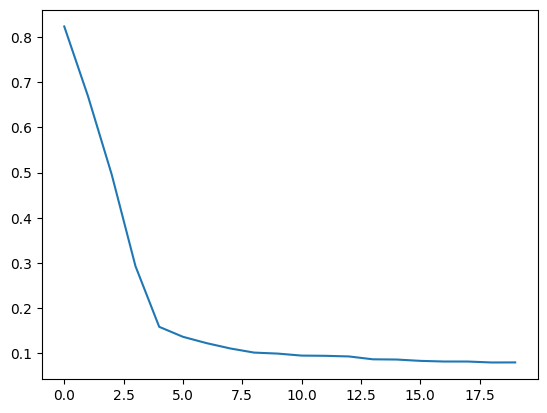

In [30]:
import matplotlib.pyplot as plt

loss_per_epoch = model1.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [31]:
def postprocess(arr):
  arr = (arr*price_training_std) + price_training_mean
  return arr.round(3)

In [32]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X).flatten()
  price_preds = postprocess(predictions)
  price_actuals = postprocess(y)
  df = pd.DataFrame(data={'Price Predictions': price_preds,
                          'Price Actuals':price_actuals,
                          })
  df.index = indices[-len(predictions):]
  return df

In [33]:
post_processed_df = get_predictions_postprocessed(model1, X_test, y_test)
post_processed_df

3/3 [==============================] - 0s 7ms/step


,Price Predictions,Price Actuals
date_arrival,,
2023-07-05,1165.188965,1245.83
2023-07-06,1185.531006,1291.20
2023-07-07,1211.011963,1210.60
2023-07-08,1220.281982,1206.83
2023-07-09,1227.329956,1252.27
...,...,...
2023-09-27,1870.107056,1978.39
2023-09-28,1893.744995,2104.41
2023-09-29,1935.022949,1874.30


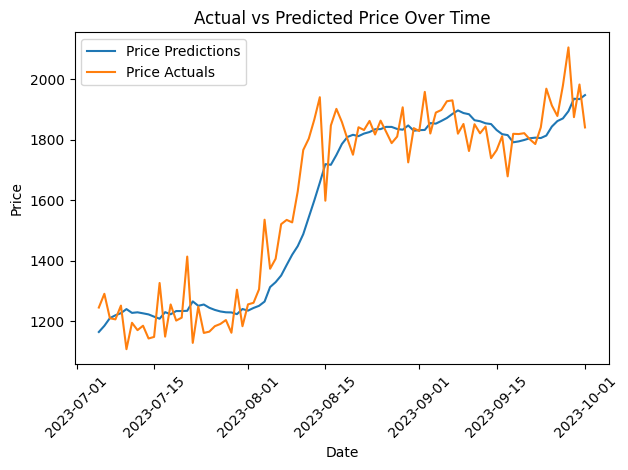

In [34]:
import matplotlib.pyplot as plt

plt.plot(post_processed_df.index, post_processed_df['Price Predictions'], label='Price Predictions')
plt.plot(post_processed_df.index, post_processed_df['Price Actuals'], label='Price Actuals')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
post_processed_df

,Price Predictions,Price Actuals
date_arrival,,
2023-07-05,1165.188965,1245.83
2023-07-06,1185.531006,1291.20
2023-07-07,1211.011963,1210.60
2023-07-08,1220.281982,1206.83
2023-07-09,1227.329956,1252.27
...,...,...
2023-09-27,1870.107056,1978.39
2023-09-28,1893.744995,2104.41
2023-09-29,1935.022949,1874.30


In [36]:
#Full data points
post_processed_fulldf = get_predictions_postprocessed(model1, X, y)
post_processed_fulldf

31/31 [==============================] - 0s 10ms/step


,Price Predictions,Price Actuals
date_arrival,,
2021-01-16,2378.502930,2394.59
2021-01-17,2379.053955,2298.81
2021-01-18,2359.157959,2324.69
2021-01-19,2344.875977,2490.36
2021-01-20,2366.097900,2469.96
...,...,...
2023-09-27,1870.107056,1978.39
2023-09-28,1893.744995,2104.41
2023-09-29,1935.022949,1874.30


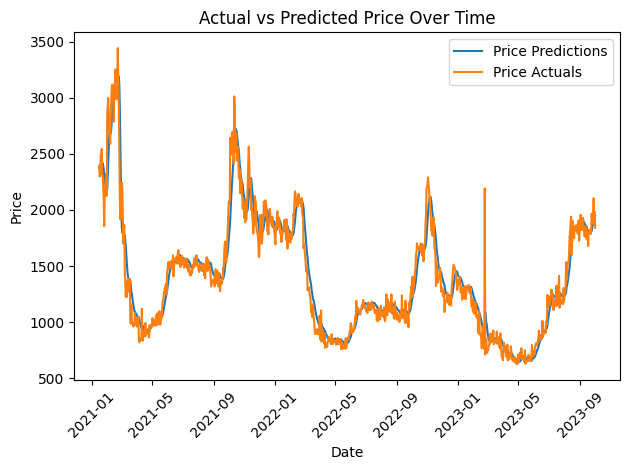

In [37]:
import matplotlib.pyplot as plt

plt.plot(post_processed_fulldf.index, post_processed_fulldf['Price Predictions'], label='Price Predictions')
plt.plot(post_processed_fulldf.index, post_processed_fulldf['Price Actuals'], label='Price Actuals')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
import numpy as np

# Define the number of days to forecast
forecast_days = 90

# Initialize an empty array to store forecasted prices
forecasted_prices = []

# Get the last n_input days from your test data as the initial input
current_batch = y[-WINDOW_SIZE:].reshape((1, WINDOW_SIZE, 1))

# Make predictions for the next 30 days
for _ in range(forecast_days):
    # Predict the next day's prices
    current_pred = model1.predict(current_batch)[0]
    
    # Append the prediction to the forecasted_prices array
    forecasted_prices.append(current_pred)
    
    # Update the current_batch with the predicted values
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Convert the list of NumPy arrays to a single NumPy array
forecasted_prices = np.array(forecasted_prices)
# Inverse transform the forecasted prices to get the actual values
forecasted_prices = postprocess(forecasted_prices)

# Create a date range for the next 30 days
from datetime import timedelta
last_date = post_processed_fulldf.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_days+1)]

# Create a DataFrame to store the forecasted prices
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Modal_Price':  forecasted_prices[:, 0]  # Assuming the third column is MODAL Price
})

forecast_df.index = pd.to_datetime(forecast_df['Date'], format = '%Y-%m-%d')

# Print or use forecast_df as needed
print(forecast_df)

1/1 [==============================] - 0s 25ms/step
                 Date  Forecasted_Modal_Price
Date                                         
2023-10-02 2023-10-02             1933.505981
2023-10-03 2023-10-03             1935.147949
2023-10-04 2023-10-04             1935.963989
2023-10-05 2023-10-05             1936.410034
2023-10-06 2023-10-06             1936.286987
...               ...                     ...
2023-12-26 2023-12-26             2030.995972
2023-12-27 2023-12-27             2031.915039
2023-12-28 2023-12-28             2032.829956
2023-12-29 2023-12-29             2033.739990
2023-12-30 2023-12-30             2034.645996

[90 rows x 2 columns]


In [48]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(forecast_df.head())

,Date,Forecasted_Modal_Price
Date,,
2023-10-02,2023-10-02,1933.505981
2023-10-03,2023-10-03,1935.147949
2023-10-04,2023-10-04,1935.963989
2023-10-05,2023-10-05,1936.410034
2023-10-06,2023-10-06,1936.286987


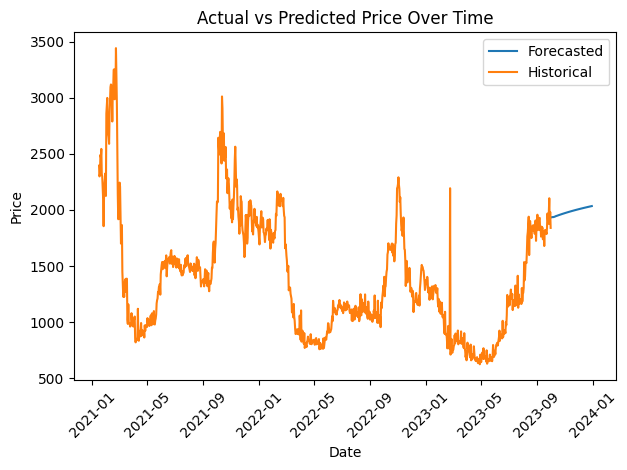

In [43]:
import matplotlib.pyplot as plt

plt.plot(forecast_df.index, forecast_df['Forecasted_Modal_Price'], label='Forecasted')
plt.plot(post_processed_fulldf.index, post_processed_fulldf['Price Actuals'], label='Historical')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
file_url = r'C:\Users\imaja\OneDrive\Desktop\MBA 2022 -2024\T5\MLA2\ETE\forecast.csv'

forecast_df.to_csv(file_url, index=False)